Сбор и анализ отзывов о ресторанах на tripadvisor.ru
=====================================================  
В проекте, вооружившись статьями из разных уважаемых источников (например, ["Ведомости"](https://www.vedomosti.ru/lifestyle/articles/2016/03/25/637995-vesna-v-restoranah-moskvi),) я решила посмотреть, можно ли статистикой по отзывам о ресторанах на сайте tripadvisor.ru проверить факт того, что люди:  
    1) стали предпочитать более дешевые рестораны более дорогим
    2) уменьшили количество походов в рестораны
То есть, как факт это доказано, мне же хотелось посмотреть, смогу ли я подтвердить его, обработав данные по частоте отзывов для каждого ресторана с указанным средним чеком.
Было сделано несколько допущений:  
    1) текущая информация по величине чека достоверна достаточно для выявления общей картины
    2) рестораны не меняли ценовую политику слишком резко в рассматриваемый период (2008-2016)

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
# Загрузить стартовую страницу и подготовить файл для записи
driver = webdriver.Chrome()
ref = 'https://www.tripadvisor.com/Restaurants-g298484-Moscow_Central_Russia.html#MAINWRAP'
driver.get(ref)
filters = ['//*[@id="jfy_filter_bar_price"]/div[2]', '//*[@id="jfy_filter_bar_price"]/div[3]', '//*[@id="jfy_filter_bar_price"]/div[4]']
for f in filters:
    i = 0
    while not 'selected' in driver.find_element_by_xpath(f).get_attribute('class') or i > 10:
        driver.find_element_by_xpath(f).click()
        time.sleep(1)
        i += 1
source = driver.page_source
f = open('tripadvisor_restaurants.csv', 'w')
f.close()

In [109]:
# Функция выгружает рестораны с ненулевым количеством отзывов
    soup = bs(page, 'lxml')
    divs = soup.findAll('div', class_='shortSellDetails')
    # Удалим рестораны с пустыми отзывами - exception из-за разной двух вариантов структуры тэгов с нулевыми отзывами
    rests_with_reviews = []
    for div in divs:
        try:
            if div.find('span', class_='reviewCount').text!='Оставить первый отзыв об этом ресторане':
                rests_with_reviews.append(div)
        except:
            pass
    # Получим имя ресторана
    names = [div.find('h3', class_='title').text.strip('\n') for div in rests_with_reviews]
    print(len(names))
    # Получим средний чек
    checks = []
    for div in rests_with_reviews:
        try:
            check = div.find('span', class_='price').text
        except:
            check = '0'
        checks.append(check)
    checks_cleaned = [re.sub('[^0-9,-]', '', check) for check in checks]
    avg_check_final = [eval(check.replace('-', '+'))/2 if '-' in check else eval(check) for check in checks_cleaned]
    avg_check_final
    # Получим ссылки на отзывы
    hrefs_raw = [div.find('span', class_='reviewCount') for div in rests_with_reviews]
    hrefs = ['https://www.tripadvisor.ru' + i.a['href'] for i in hrefs_raw]
    # допишем в файл
    database = pd.DataFrame(data = list(zip(names, avg_check_final, hrefs)))
    with open(file, 'a') as f:
        database.to_csv(f, encoding='cp1251', header = False, index=False)

In [116]:
# Проходим по выданным фильтром страницам и собираем начальную информацию
page_num = 1
position = 30
last_page = int(driver.find_element_by_css_selector("#EATERY_LIST_CONTENTS > div.deckTools.btm > div > div > a:nth-child(8)").text)
print(last_page)
while page_num <= last_page:
    href = 'https://www.tripadvisor.ru/RestaurantSearch-g298484-oa'+ str(position) + '-p15-Moscow_Central_Russia.html#EATERY_LIST_CONTENTS'
    driver.get(href)
    source = driver.page_source
    download_rests_data(source, 'tripadvisor_restaurants.csv')
    print(page_num, "done")
    page_num += 1
    position += 30

39
30
1 done
30
2 done
30
3 done
30
4 done
30
5 done
30
6 done
30
7 done
30
8 done
30
9 done
30
10 done
30
11 done
30
12 done
30
13 done
30
14 done
30
15 done
30
16 done
30
17 done
30
18 done
30
19 done
30
20 done
30
21 done
30
22 done
30
23 done
30
24 done
30
25 done
30
26 done
30
27 done
30
28 done
30
29 done
30
30 done
30
31 done
30
32 done
30
33 done
20
34 done
0
35 done
0
36 done
0
37 done
0
38 done
30
39 done


In [5]:
# Открываем получившийся CSV в виде датафрейма, добавляем хэдеры
database = pd.read_csv('tripadvisor_restaurants.csv', header = None, names = ['Name', 'Avg check', 'Hrefs'], encoding = 'cp1251')
# Примечание: некоторые рестораны в списке повторялись по несколько раз, но отзывы в них не повторялись, поэтому я не стала фильтровать по имени

In [6]:
database[1:10]

,Name,Avg check,Hrefs
1,I Like Wine,1493.0,https://www.tripadvisor.ru/Restaurant_Review-g...
2,Савва,2521.5,https://www.tripadvisor.ru/Restaurant_Review-g...
3,Кафе Сценарио,896.0,https://www.tripadvisor.ru/Restaurant_Review-g...
4,Стейк Хаус Бизон,2754.0,https://www.tripadvisor.ru/Restaurant_Review-g...
5,Бардак,531.0,https://www.tripadvisor.ru/Restaurant_Review-g...
6,Венеция,1028.5,https://www.tripadvisor.ru/Restaurant_Review-g...
7,Кафе Рулет,1260.5,https://www.tripadvisor.ru/Restaurant_Review-g...
8,Ресторан Воронеж,1758.5,https://www.tripadvisor.ru/Restaurant_Review-g...
9,Кафе Натахтари,1161.5,https://www.tripadvisor.ru/Restaurant_Review-g...


In [10]:
def get_revs_data(page, lst):
    driver.get(page)
    try:
        last_page = int(driver.find_element_by_xpath(("//a[@class='pageNum taLnk' and contains(@onclick,'last')]")).text)
    except:
        last_page = 1
    months = {' января ':'01', ' февраля ':'02', ' марта ':'03', ' апреля ':'04', ' мая ':'05', ' июня ':'06', ' июля ':'07', ' августа ':'08',
            ' сентября ':'09', ' октября ':'10', ' ноября ':'11', ' декабря ':'12'}
    pattern = re.compile(r'\b(' +'|'.join(months.keys())+ r')\b')
    page_num = 1
    position = 10
    dates = []
    ratings = []
    while page_num <= last_page:
        if page_num == 1:
            rev_href = page
        else:
            rev_href = re.sub(r'^((.*?-.*?){2})-', r'\1-or%s-' %position, page)
            if page_num < last_page:
                position += 10
            driver.get(rev_href)
        rest_soup = bs(driver.page_source,'lxml')
        review_bubbles = rest_soup.findAll('div', class_='reviewItemInline')
        for bubble in review_bubbles:
                # Получим даты отзывов
            raw_date1 = bubble.find('span', class_='ratingDate')
                # Опытным путем было выяснено, что newlines внутри тэга мешают дальнейшей обработке и их пришлось удалить на этом этапе
                # Из-за неоднородной структуры страниц несколько исключений
            try:
                raw_date1.string.replace_with(raw_date1.string.strip())
            except:
                raw_date1.previousSibling.replace_with(raw_date1.previousSibling.strip())
            try:
                date = raw_date1['title']
            except:
                date = raw_date1.text.split(' ', 2)[-1]
            raw_date2 = pattern.sub(lambda x: months[x.group()], date)
                # В некоторых случаях strptime не парсит даты, например '3122013' возвращает ошибку out of range,в то же время '8122013' распознает
                # Способа нормально обойти это с помощью модифицирования функции не нашлось, поэтому пришлось сделать наивно:
            if len(raw_date2) == 7:
                raw_date2 = '0' + raw_date2
            date_fine = datetime.datetime.strptime(raw_date2, "%d%m%Y").date()
            dates.append(date_fine)
                # Собираем рейтинги
            rating = int(bubble.img['alt'].split(' ',1)[0])
            ratings.append(rating)
        print(page_num, ' done')
        page_num += 1
    stat = list(zip(dates, ratings))
    lst.append(stat)

In [130]:
# Для каждого ресторана заходим в href, проходимся по ссылкам и собираем дату и рейтинг для каждого отзыва
# Записываем даты и рейтинги в structured numpy array
# Добавляем в датафрейм column и помещаем туда массив для каждого ресторана
stats = []
for href in database['Hrefs']:
        name = database['Name'][database['Hrefs'] == href]
        print(name)
        get_revs_data(href, stats)
        print(name, 'DONE')
stats_as_arr = [np.array(stat, dtype=[('datetime64', object), ('x','f')]) for stat in stats]
np.save('stats_as_arr', stats_as_arr)

0    Корчма Тарас Бульба
Name: Name, dtype: object
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
0    Корчма Тарас Бульба
Name: Name, dtype: object DONE
1    I Like Wine
Name: Name, dtype: object
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
1    I Like Wine
Name: Name, dtype: object DONE
2    Савва
Name: Name, dtype: object
1  done
2  done
3  done
4  done
5  done
6  done
7  done
2    Савва
Name: Name, dtype: object DONE
3    Кафе Сценарио
Name: Name, dtype: object
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
3    Кафе Сценарио
Name: Name, dtype: object DONE
4    Стейк Хаус Бизон
Name: Name, dtype: object
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10

In [7]:
# Возникла проблема с сохранением формата numpy array при чтении датафрейма из файла, поэтому я сохранила данные как recarrays
# в бинарном формате в отдельный файл и затем подгружаю и прикрепляю его к датафрейму
stats = np.load('stats_as_arr.npy')
database['Stats'] = stats
database = database.drop('Hrefs', axis = 1)

In [8]:
# UPD Выяснилось, что удобнее работать со структурированными массивами, чтобы обращаться к колонкам по именам
stats_rec = []
for stat in database['Stats']:
    stat = stat.view(np.recarray)
    stat.sort(order = 'datetime64')
    stats_rec.append(stat)
database['Stats'] = stats_rec

In [9]:
database = database.sort_values(by=['Avg check'])
database

,Name,Avg check,Stats
881,Брюсофф,0.0,"[[2014-07-07, 5.0], [2014-09-30, 5.0], [2014-1..."
493,Кафе Veranda,0.0,"[[2014-07-22, 4.0], [2014-07-29, 5.0], [2014-0..."
452,Дэйли Кофе,165.5,"[[2016-01-29, 5.0], [2016-02-03, 5.0], [2016-0..."
463,Aromi la bottega,165.5,"[[2013-08-26, 5.0], [2014-03-11, 5.0], [2014-0..."
466,БухУчёт,165.5,"[[2016-01-09, 5.0], [2016-03-02, 5.0], [2016-0..."
893,Ватрушка,165.5,"[[2016-01-29, 5.0], [2016-02-02, 5.0], [2016-0..."
456,Koupes Bar,166.0,"[[2015-07-22, 5.0], [2015-09-07, 5.0], [2015-0..."
164,Пян-се,166.0,"[[2015-03-15, 4.0], [2015-03-26, 4.0], [2015-0..."
764,Caffe del Parco,199.0,"[[2014-06-08, 5.0], [2014-07-25, 4.0], [2014-1..."
676,Urban Cafe,199.0,"[[2015-10-05, 5.0]]"


In [10]:
# Были удалены аутлаеры
database = database.drop([824, 369, 881, 493, 29, 531], axis = 0)
database.reset_index(inplace = True, drop = True)

График даты первого отзыва на размер (текущего) чека:
------------------------------------------------
Можно визуально оценить зависимость даты первого отзыва от размера среднего чека ресторана. Идея в том, что дата первого отзыва приближает момент, когда ресторан был открыт / замечен посетителями. Соображения о сумме чека, указанные в начале, остаются в силе

In [11]:
database['1st revw date'] = pd.Series([database['Stats'][i][0].datetime64 for i in range(0, len(database.index))])

In [12]:
database[1:10]

,Name,Avg check,Stats,1st revw date
1,Aromi la bottega,165.5,"[[2013-08-26, 5.0], [2014-03-11, 5.0], [2014-0...",2013-08-26
2,БухУчёт,165.5,"[[2016-01-09, 5.0], [2016-03-02, 5.0], [2016-0...",2016-01-09
3,Ватрушка,165.5,"[[2016-01-29, 5.0], [2016-02-02, 5.0], [2016-0...",2016-01-29
4,Koupes Bar,166.0,"[[2015-07-22, 5.0], [2015-09-07, 5.0], [2015-0...",2015-07-22
5,Пян-се,166.0,"[[2015-03-15, 4.0], [2015-03-26, 4.0], [2015-0...",2015-03-15
6,Caffe del Parco,199.0,"[[2014-06-08, 5.0], [2014-07-25, 4.0], [2014-1...",2014-06-08
7,Urban Cafe,199.0,"[[2015-10-05, 5.0]]",2015-10-05
8,Пян-се,199.0,"[[2015-09-04, 5.0], [2015-09-22, 5.0], [2015-0...",2015-09-04
9,ПитерБургер,199.0,"[[2016-03-02, 5.0], [2016-03-11, 5.0], [2016-0...",2016-03-02


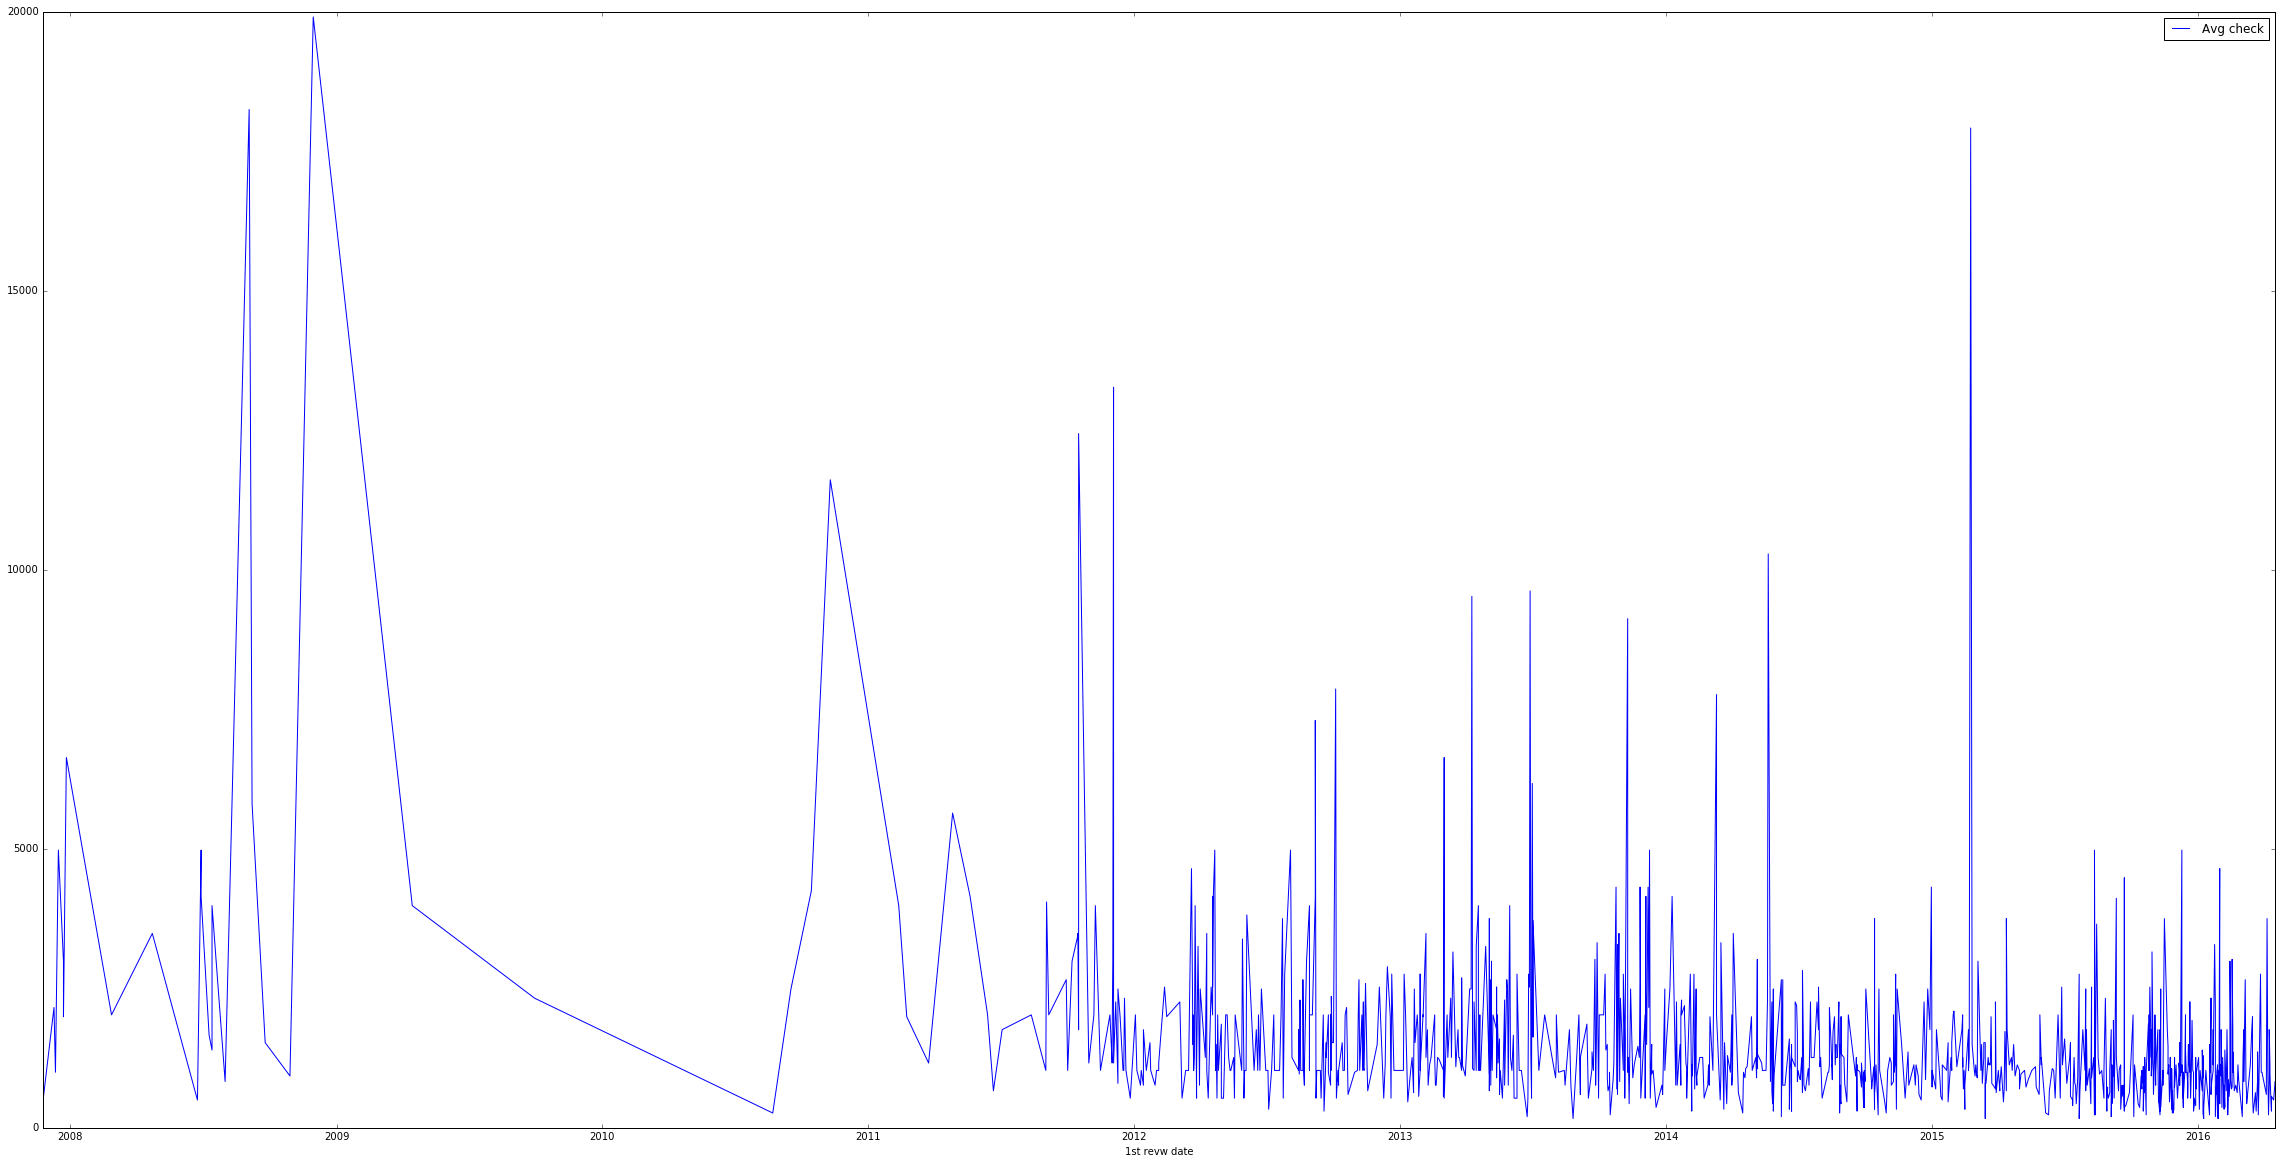

In [13]:
database.plot(x = '1st revw date',  y = 'Avg check', figsize = [40, 20])

Видно, что после 2015 г. был только один большой пик - первый отзыв на ресторан с размером чека более 15000 руб, также уменьшилось количество первых отзывов на рестораны с чеком в рамках 7000-15000.  Также можно заметить, что количество первых отзывов на рестораны с чеком <5000 руб увеличилось по сравнению с последними двумя годами (по более плотному заполнению пиками), но это может быть объяснено многими факторами, помимо возросшего внимания потребителей к недорогим ресторанам: например, возросшей популярностью самого ресурса tripadvisor.ru

В следующем графике была сделана попытка визуализировать частотное распределение всех отзывов в зависимости от среднего чека

In [366]:
lst = []
for i in range(0, len(database.index)):
    for j in range(0, database['Stats'][i].size):
        x = (database['Stats'][i][j].datetime64, database['Avg check'][i])
        lst.append(x)

In [367]:
date_check_arr = np.rec.array(lst, dtype=[('datetime64', 'O'), ('check', 'f')])

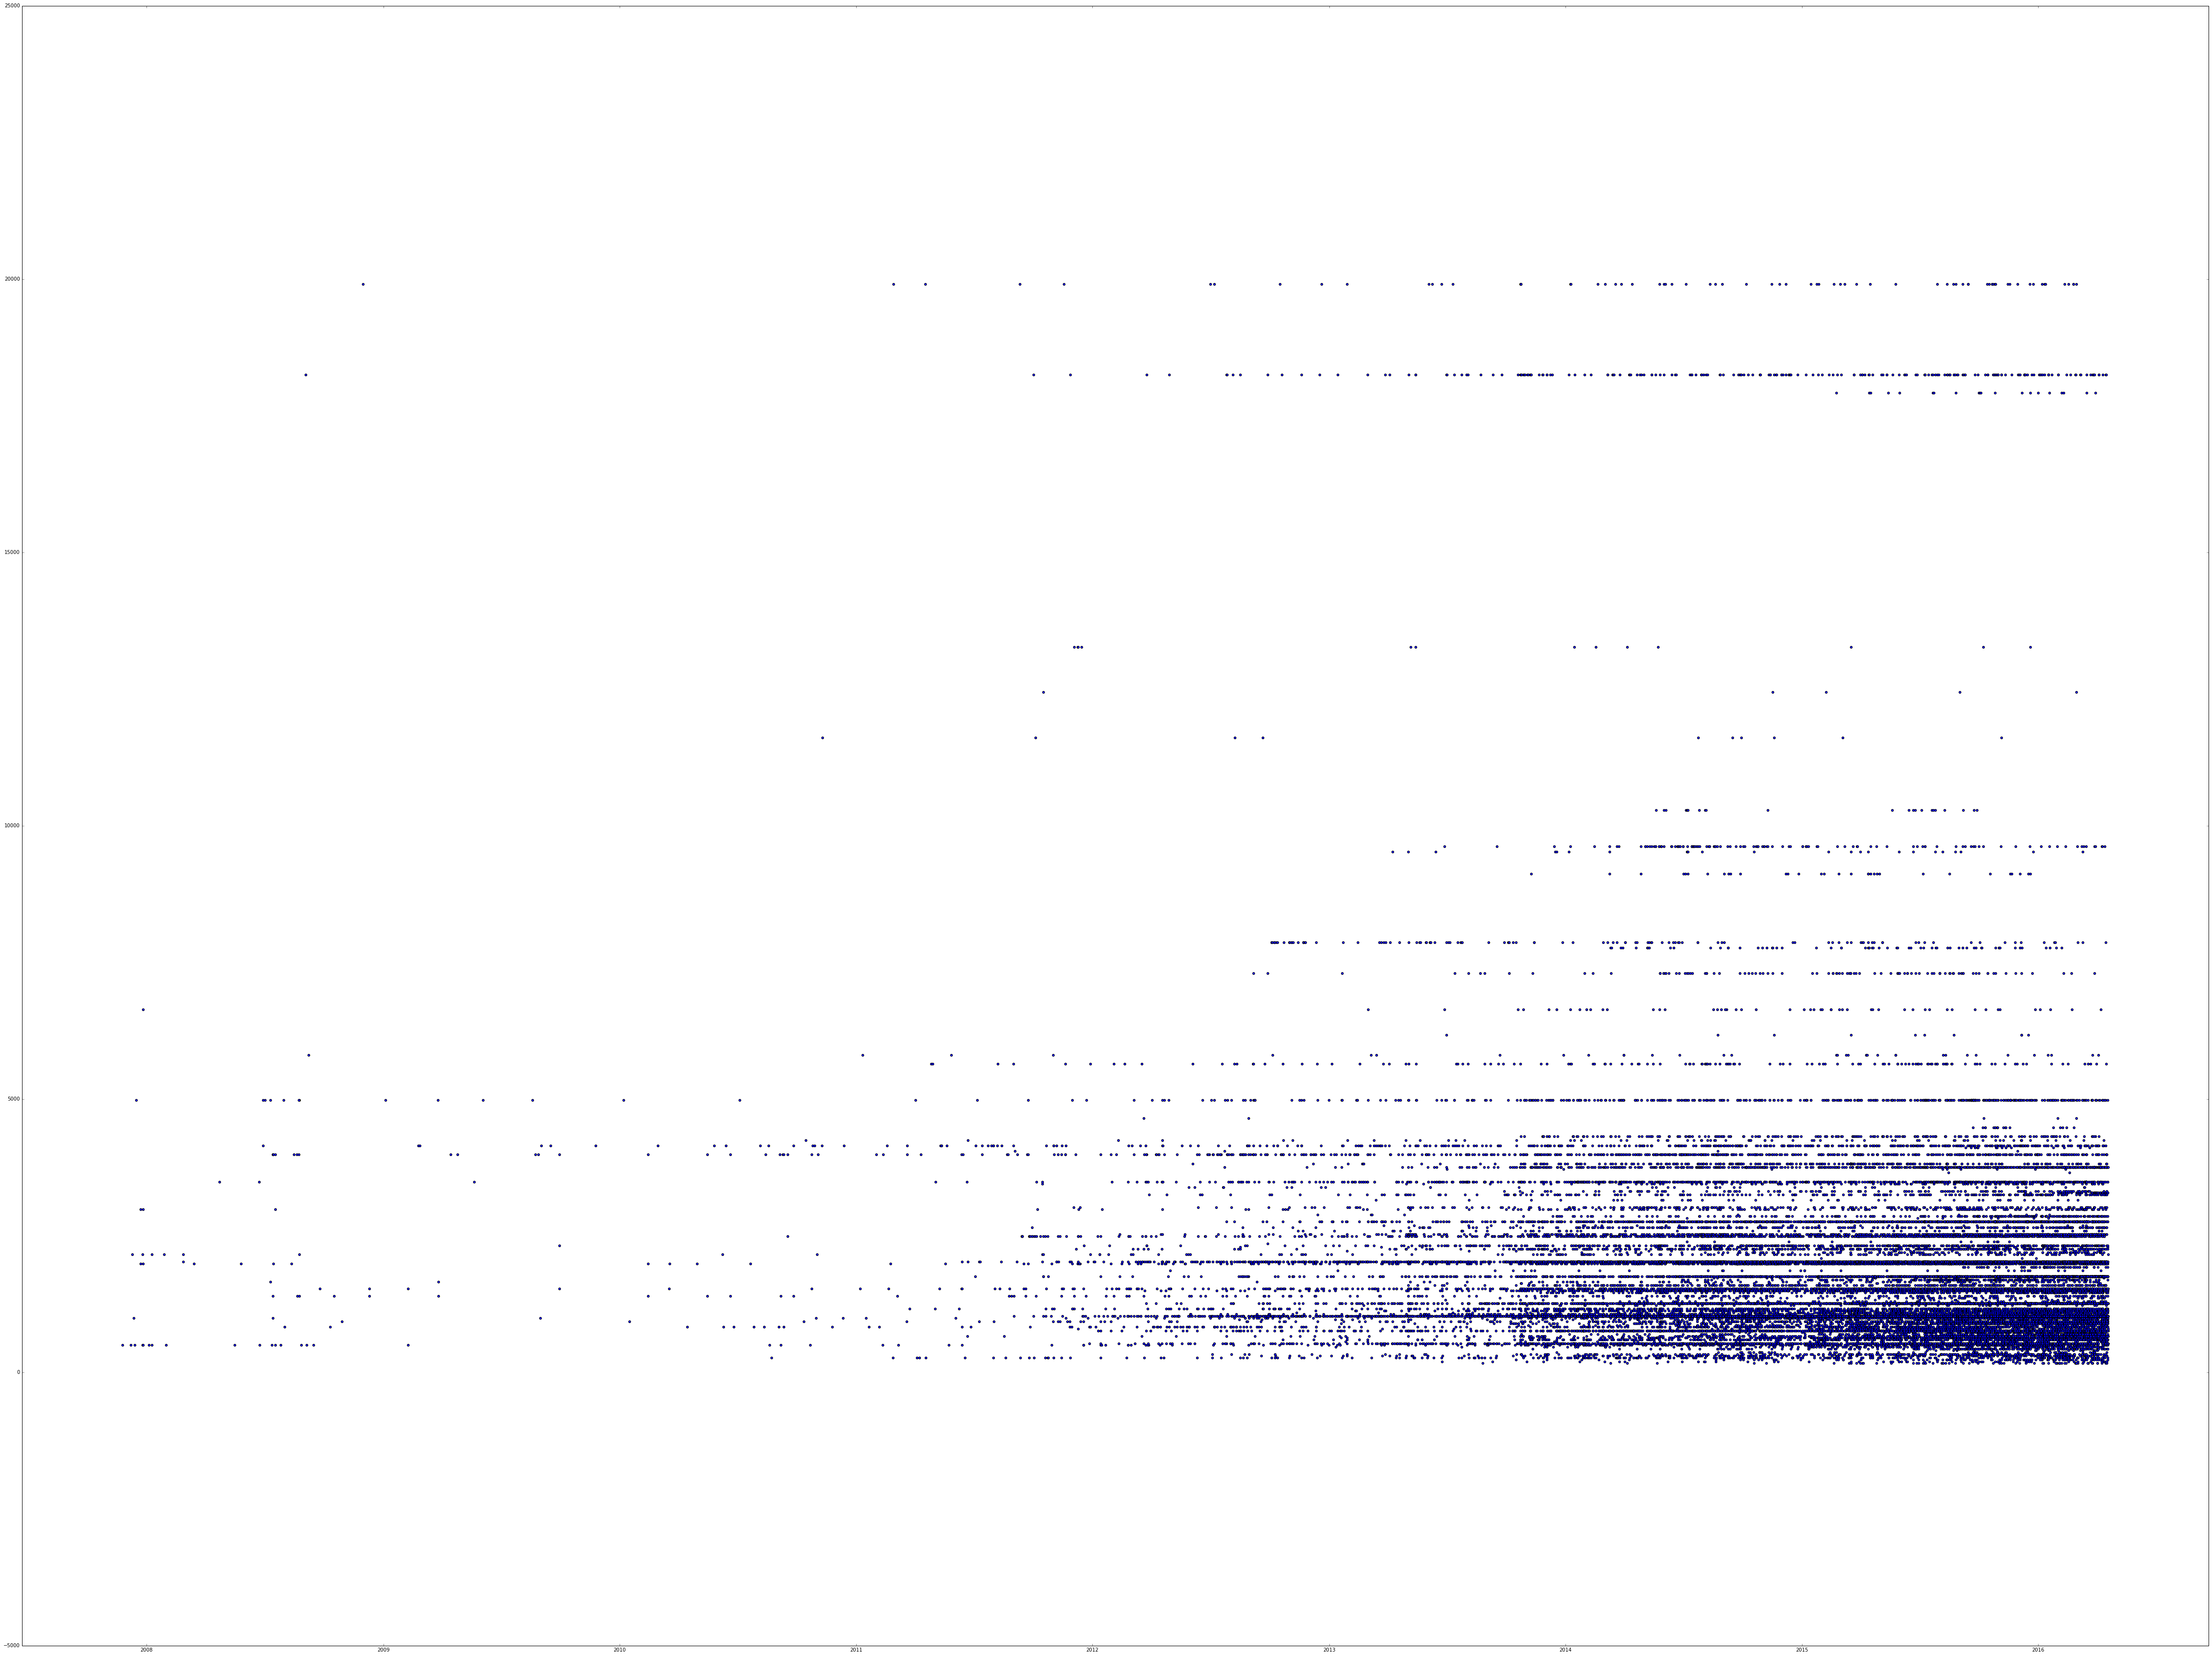

In [368]:
plt.figure(figsize=(80,60))
plt.scatter(date_check_arr.datetime64, date_check_arr.check)

Но как видно, такая картинка ничего не дала, потому что точки расположены слишком плотно :(   
Поэтому для третьего графика было решено рассчитать процентное изменение количества отзывов за каждый месяц, разделить линии ресторанов по цвету в зависимости от величины чека и посмотреть, линии какого цвета будут стремиться преимущественно к верхнему, а какие - к нижнему сегменту графика в период с 2015 г.

In [369]:
def get_percent_chnge(arr, lst):
    months = np.arange('2008-01', '2016-05', dtype='datetime64').astype('O')
    months_counts = np.core.records.fromarrays([months, np.zeros_like(months, dtype = 'i')], names = 'date, count')
    for i in arr:
        for j in months_counts:
            if i.datetime64.month==j.date.month and i.datetime64.year==j.date.year:
                j.count += 1
    base_value_index = np.nonzero(months_counts.count)[0][0]-1
    months_counts.count = np.cumsum(months_counts.count)
    change_array = np.diff(months_counts.count) / np.abs(months_counts[:-1].count)*100
    change_array[base_value_index] = 0
    change_array[np.isnan(change_array)] = 0
    change_array = np.insert(change_array, 1, 0)
    months_change = np.core.records.fromarrays([months, np.cumsum(change_array)], dtype=[('date', 'O'), ('change', '<f2')], names = 'date, change')
    lst.append(months_change)

In [370]:
percent_changes = []
for i in database['Stats']:
    get_percent_chnge(i, percent_changes)

In [379]:
database['% chnge 2008-2016'] = percent_changes

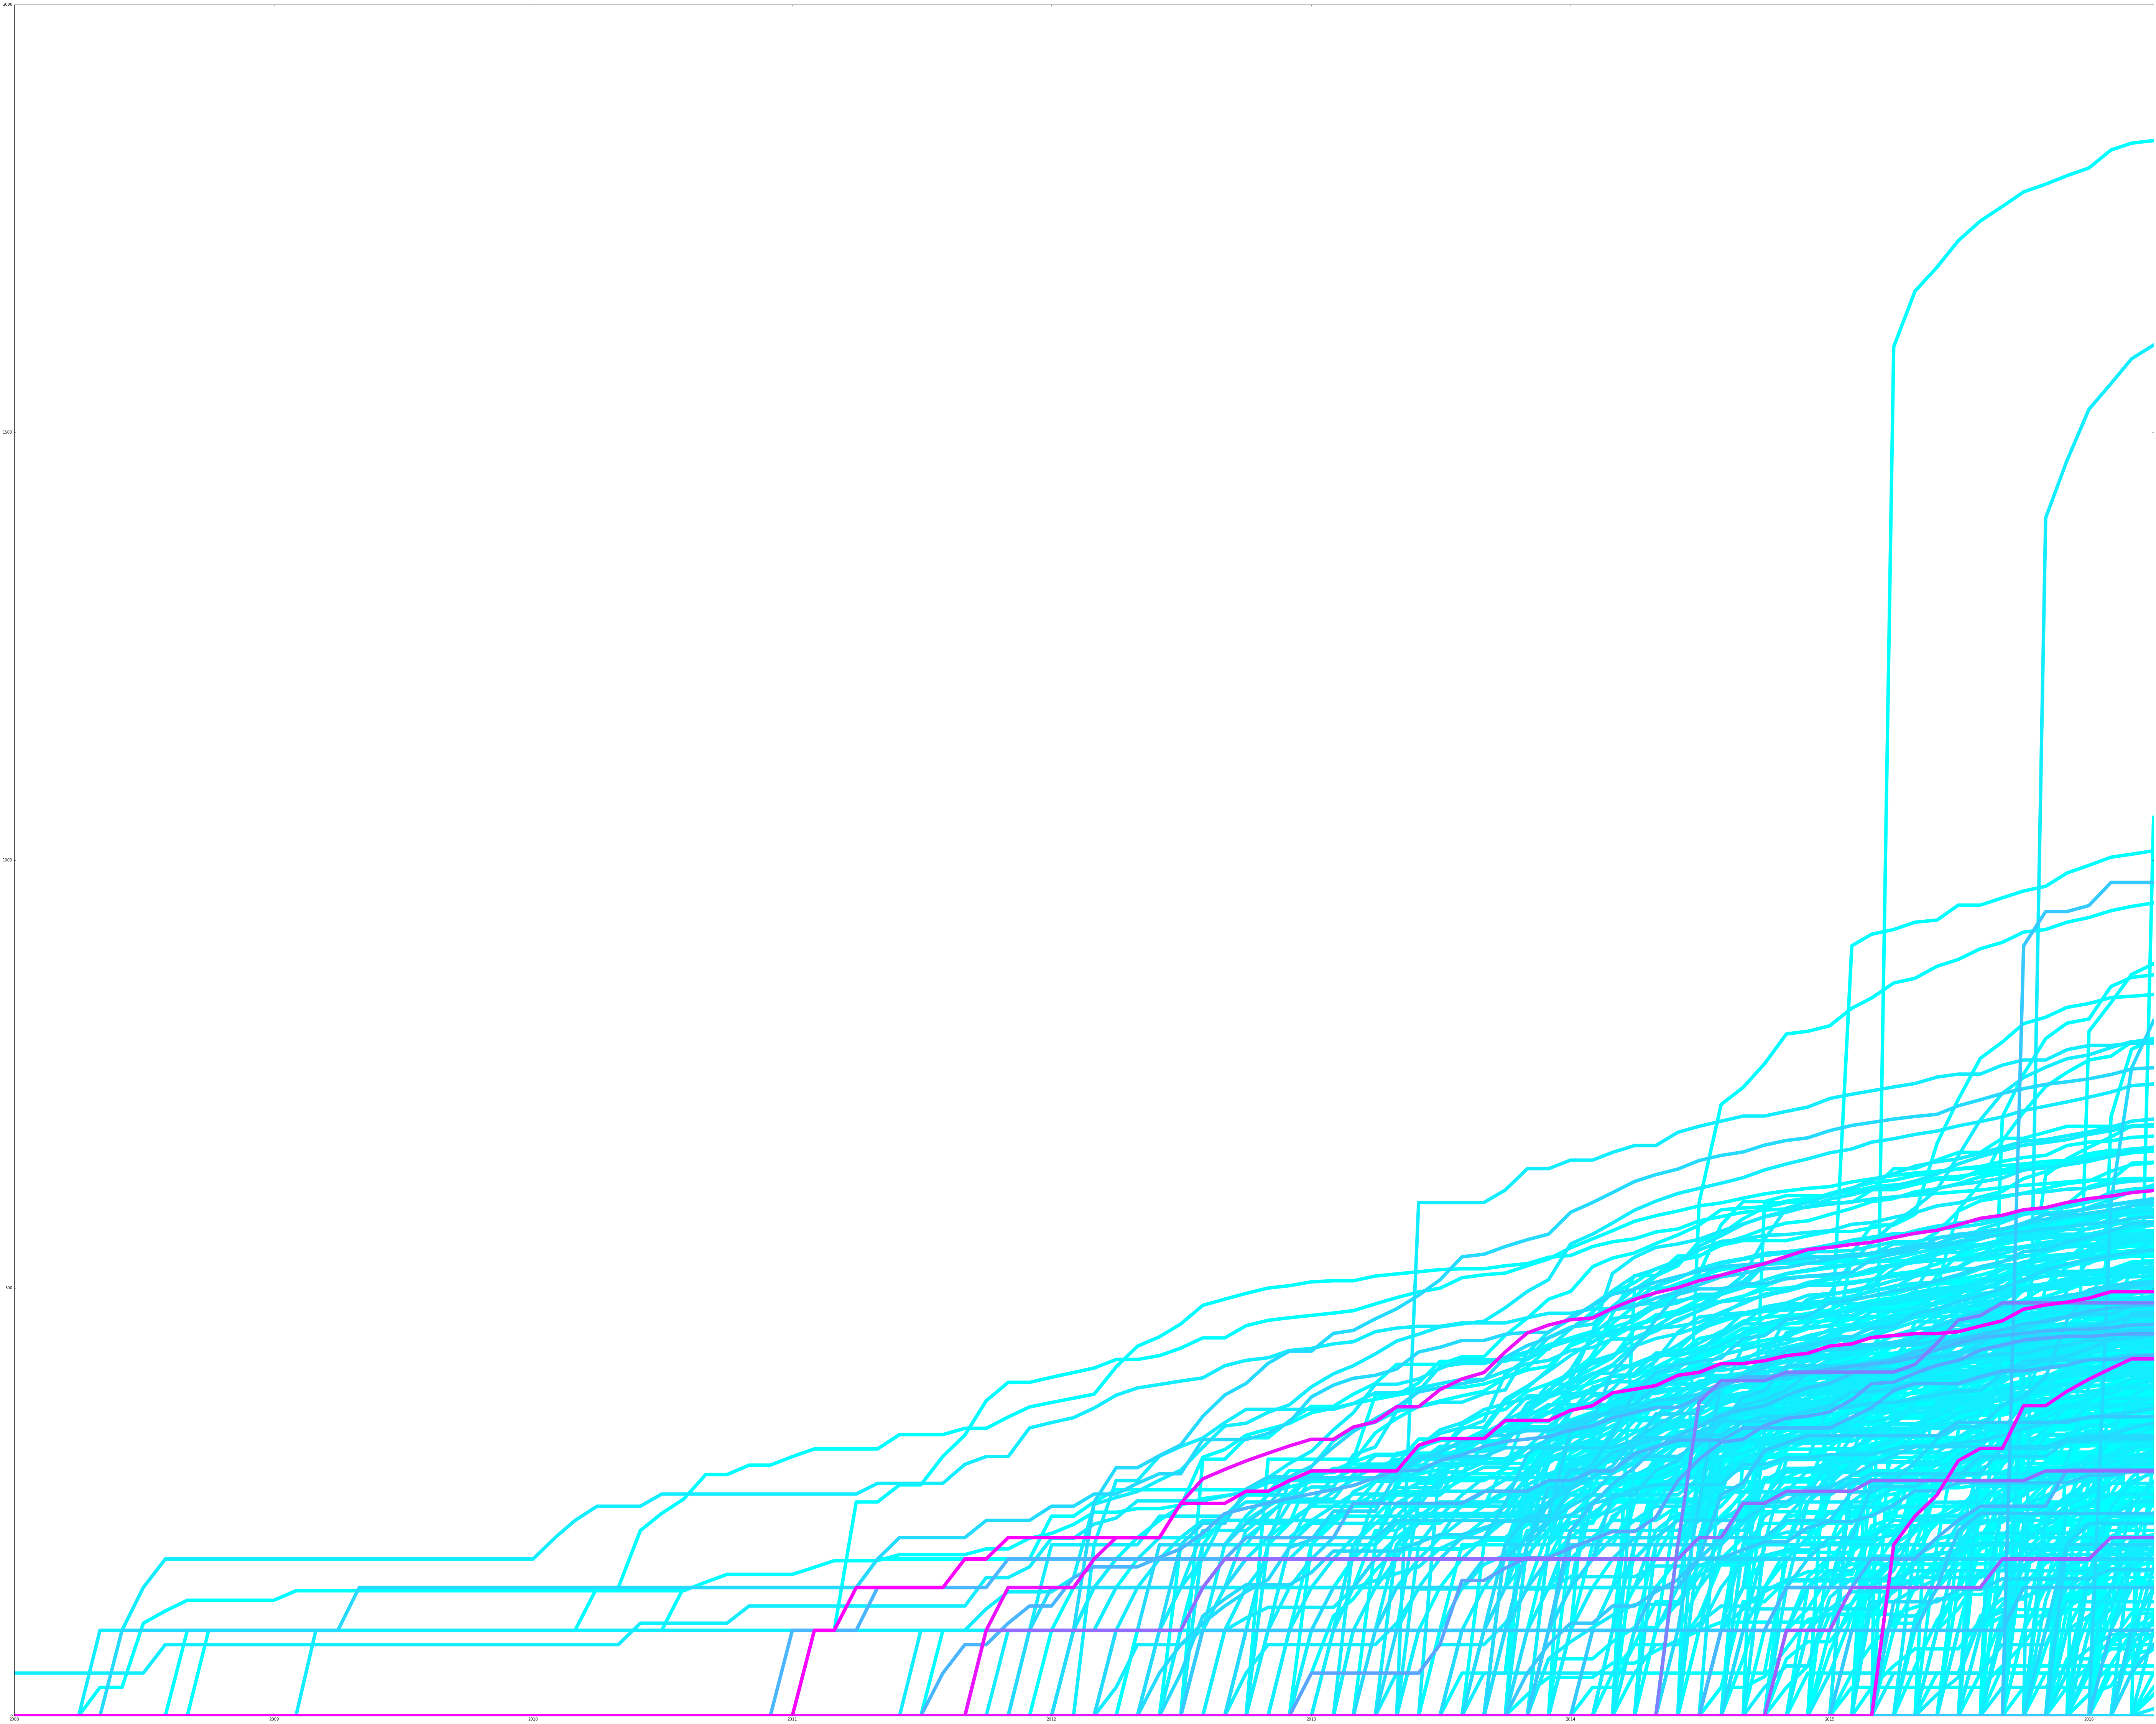

In [386]:
filters = np.linspace(database['Avg check'].min(), database['Avg check'].max()+1, 30)
filter_pairs = [tuple(p) for p in np.split(filters, 15)]
color_ids = np.linspace(0, 1, len(filter_pairs))
plt.figure(figsize=(100,80))
for f,i in enumerate(color_ids):
    x = database['% chnge 2008-2016'][(database['Avg check']>filter_pairs[f][0]) & (database['Avg check']<filter_pairs[f][1])]
    for j in x:
        plt.plot(j.date, j.change, color=plt.cm.cool(i), lw=9)

На этом графике рестораны от более дорогого чека к более дешевому меняют цвет с фиолетового на голубой. Хотя график опять очень плотный, видно, что динамика изменения количества отзывов выше для ресторанов из более бюджетных категорий, причем этот тренд наметился даже раньше 2015 г, что, возможно, объясняется спецификой ресурса tripadvisor. Есть несколько подозрительно резко набравших отзывы бюджетных ресторанов, для которых будет интересно посмотреть на рейтинг отзывов. Видно, что для большинства ресторанов наклон кривой прироста количества отзывов падает, что, в том числе, говорит о том, что люди уменьшили число походов в рестораны в принципе. Такая приближенная картинка согласуется с предположениями, выдвинутыми в начале.

В заключение нужно пояснить, что рейтинги, собранные вместе с датой каждого отзыва, не использованные в данном проекте, я собрала, чтобы воспользоваться ими в следующем проекте на R.
Спасибо за внимание :)

In [14]:
for i in database['Stats'][1000:1039]:
    plt.plot(database['Stats'][i].datetime64, database['Stats'][i].x)
    

AttributeError: 'Series' object has no attribute 'datetime64'

In [17]:
database['Stats'][1].datetime64

array([datetime.date(2013, 8, 26), datetime.date(2014, 3, 11),
       datetime.date(2014, 4, 6), datetime.date(2014, 5, 22),
       datetime.date(2014, 10, 19), datetime.date(2014, 11, 7),
       datetime.date(2015, 2, 19), datetime.date(2015, 3, 18),
       datetime.date(2015, 8, 16), datetime.date(2015, 12, 3),
       datetime.date(2016, 1, 30)], dtype=object)

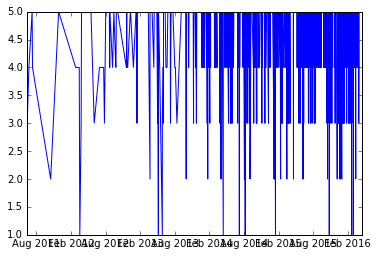

In [41]:
plt.plot(database['Stats'][1015].datetime64, database['Stats'][1015].x)

In [21]:
df2 = database.set_index(['Name'])

In [42]:
database[5:(5+2)]

,Name,Avg check,Stats,1st revw date
5,Пян-се,166,"[[2015-03-15, 4.0], [2015-03-26, 4.0], [2015-0...",2015-03-15
6,Caffe del Parco,199,"[[2014-06-08, 5.0], [2014-07-25, 4.0], [2014-1...",2014-06-08


In [43]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9], 
                   [10, 11, 12], 
                   [13, 14, 15], 
                   [16, 17, 18], 
                   [19, 20, 21]])

In [46]:
df[4:(4+1)]

,0,1,2
4,13,14,15


In [45]:
database

,Name,Avg check,Stats,1st revw date
0,Дэйли Кофе,165.5,"[[2016-01-29, 5.0], [2016-02-03, 5.0], [2016-0...",2016-01-29
1,Aromi la bottega,165.5,"[[2013-08-26, 5.0], [2014-03-11, 5.0], [2014-0...",2013-08-26
2,БухУчёт,165.5,"[[2016-01-09, 5.0], [2016-03-02, 5.0], [2016-0...",2016-01-09
3,Ватрушка,165.5,"[[2016-01-29, 5.0], [2016-02-02, 5.0], [2016-0...",2016-01-29
4,Koupes Bar,166.0,"[[2015-07-22, 5.0], [2015-09-07, 5.0], [2015-0...",2015-07-22
5,Пян-се,166.0,"[[2015-03-15, 4.0], [2015-03-26, 4.0], [2015-0...",2015-03-15
6,Caffe del Parco,199.0,"[[2014-06-08, 5.0], [2014-07-25, 4.0], [2014-1...",2014-06-08
7,Urban Cafe,199.0,"[[2015-10-05, 5.0]]",2015-10-05
8,Пян-се,199.0,"[[2015-09-04, 5.0], [2015-09-22, 5.0], [2015-0...",2015-09-04
9,ПитерБургер,199.0,"[[2016-03-02, 5.0], [2016-03-11, 5.0], [2016-0...",2016-03-02
